Here's the link to the GitHub Assignment: https://classroom.github.com/a/pITaFpsPLinks to an external site.

For this assignment, we will use the seeds_dataset.txtLinks to an external site. obtained from the UCI Machine Learning Repository. The dataset is in this repository at data/seeds_dataset.txt.

Data Source
MaÅ‚gorzata Charytanowicz, Jerzy Niewczas Institute of Mathematics and Computer Science, The John Paul II Catholic University of Lublin, KonstantynÃ³w 1 H, PL 20-708 Lublin, Poland e-mail: {mchmat,jniewczas}@kul.lublin.pl

Piotr Kulczycki, Piotr A. Kowalski, Szymon Lukasik, Slawomir Zak Department of Automatic Control and Information Technology, Cracow University of Technology, Warszawska 24, PL 31-155 Cracow, Poland and Systems Research Institute, Polish Academy of Sciences, Newelska 6, PL 01-447 Warsaw, Poland e-mail: {kulczycki,pakowal,slukasik,slzak}@ibspan.waw.pl

Data Set Information:
The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.

Attribute Information:
To construct the data, seven geometric parameters of wheat kernels were measured:

Dataset column label	Original Description
area	1. area A
perimiter	2. perimeter P
compactness	3. compactness C = 
4π∗A/P2
length	4. length of kernel
width	5. width of kernel
asym_coeff	6. asymmetry coefficient
groove_len	7. length of kernel groove
variety	In a classic 🤦 of Metadata gone wrong, there is no key but there are 3 varieties of wheat in the description (Kama, Rosa and Canadian). For our purposes it doesn't realy matter, and we can call them variety 1, 2, and 3 as labeled...
Note that the datafile is tab delimited.

All of these parameters were real-valued continuous.

The assignment
Your task is to use the data to:

Load the data and get it ready for analysis


Visualize the data in some way (e.g. pairplot or scatterplots)
-Construct a decision tree to classify the seeds by variety (no need to visualize, but can print the tree itself
--note that since there are now more than two X columns, you can't make the plots like in the class notebook that had only X[0] and X[1]. 
--You can plot the decision tree if you want.)
-Use a random forest method to classify the seeds by variety
-Discuss the results, accuracy of your models, etc.


Rubric:
Importing data: 2 points
Visualizing data for exploration: 5 points
Simple decision tree: 5 points
Random Forest: 10 points
Final model and some discussion of the process: 8 points

Reference to get the data set https://archive.ics.uci.edu/dataset/236/seeds

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report



# Assuming "seeds_dataset.txt" is in the same directory as your Python script
file_path = "seeds_dataset.txt"

# Define column names based on the dataset description
column_names = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 
                'asymmetry_coefficient', 'length_of_kernel_groove', 'seed_type' ] # seed type = variety

#unsure if variety needs to be here
# Load the dataset into a Pandas DataFrame
seeds_df = pd.read_csv(file_path, sep='\s+', header=None, names=column_names)

# Display the first few rows of the DataFrame
print(seeds_df.head())




    area  perimeter  compactness  length_of_kernel  width_of_kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   asymmetry_coefficient  length_of_kernel_groove  seed_type  
0                  2.221                    5.220          1  
1                  1.018                    4.956          1  
2                  2.699                    4.825          1  
3                  2.259                    4.805          1  
4                  1.355                    5.175          1  


In [76]:
#getting all rows of the seed_type column
seeds_df.loc[:,['seed_type']]

,seed_type
0,1
1,1
2,1
3,1
4,1
...,...
205,3
206,3
207,3
208,3


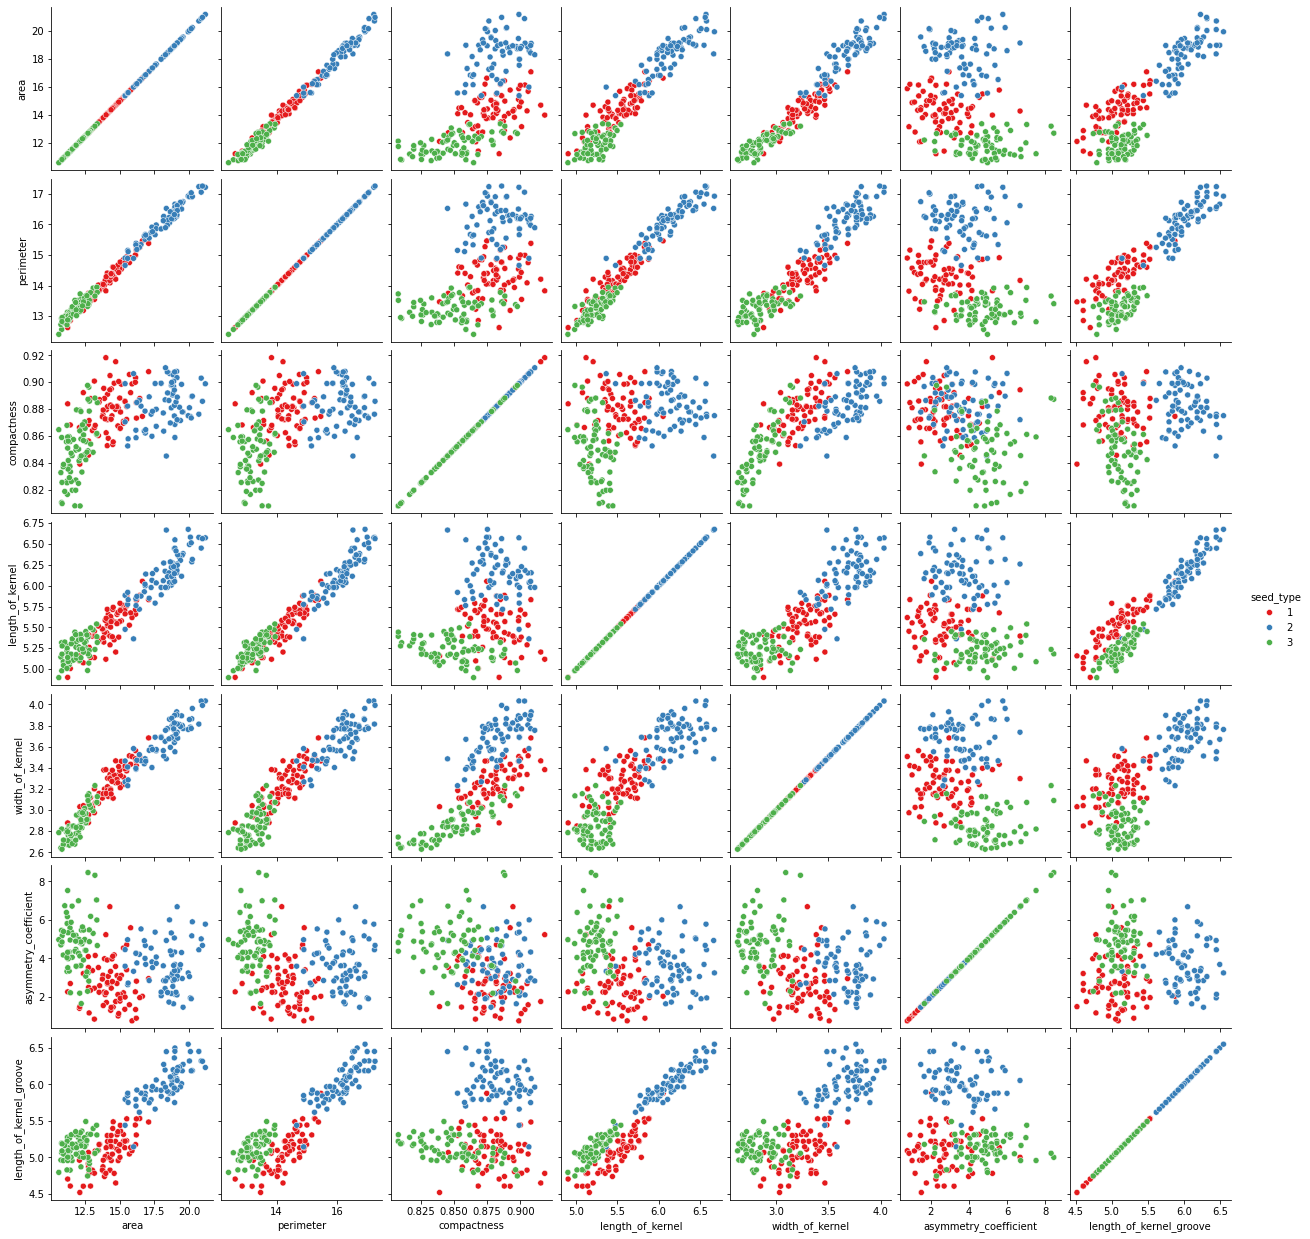

In [77]:
# Create scatterplot matrix using Seaborn without specifying markers
sns.pairplot(seeds_df, hue='seed_type', palette='Set1', vars=column_names[:-1], diag_kind=None)
plt.show()

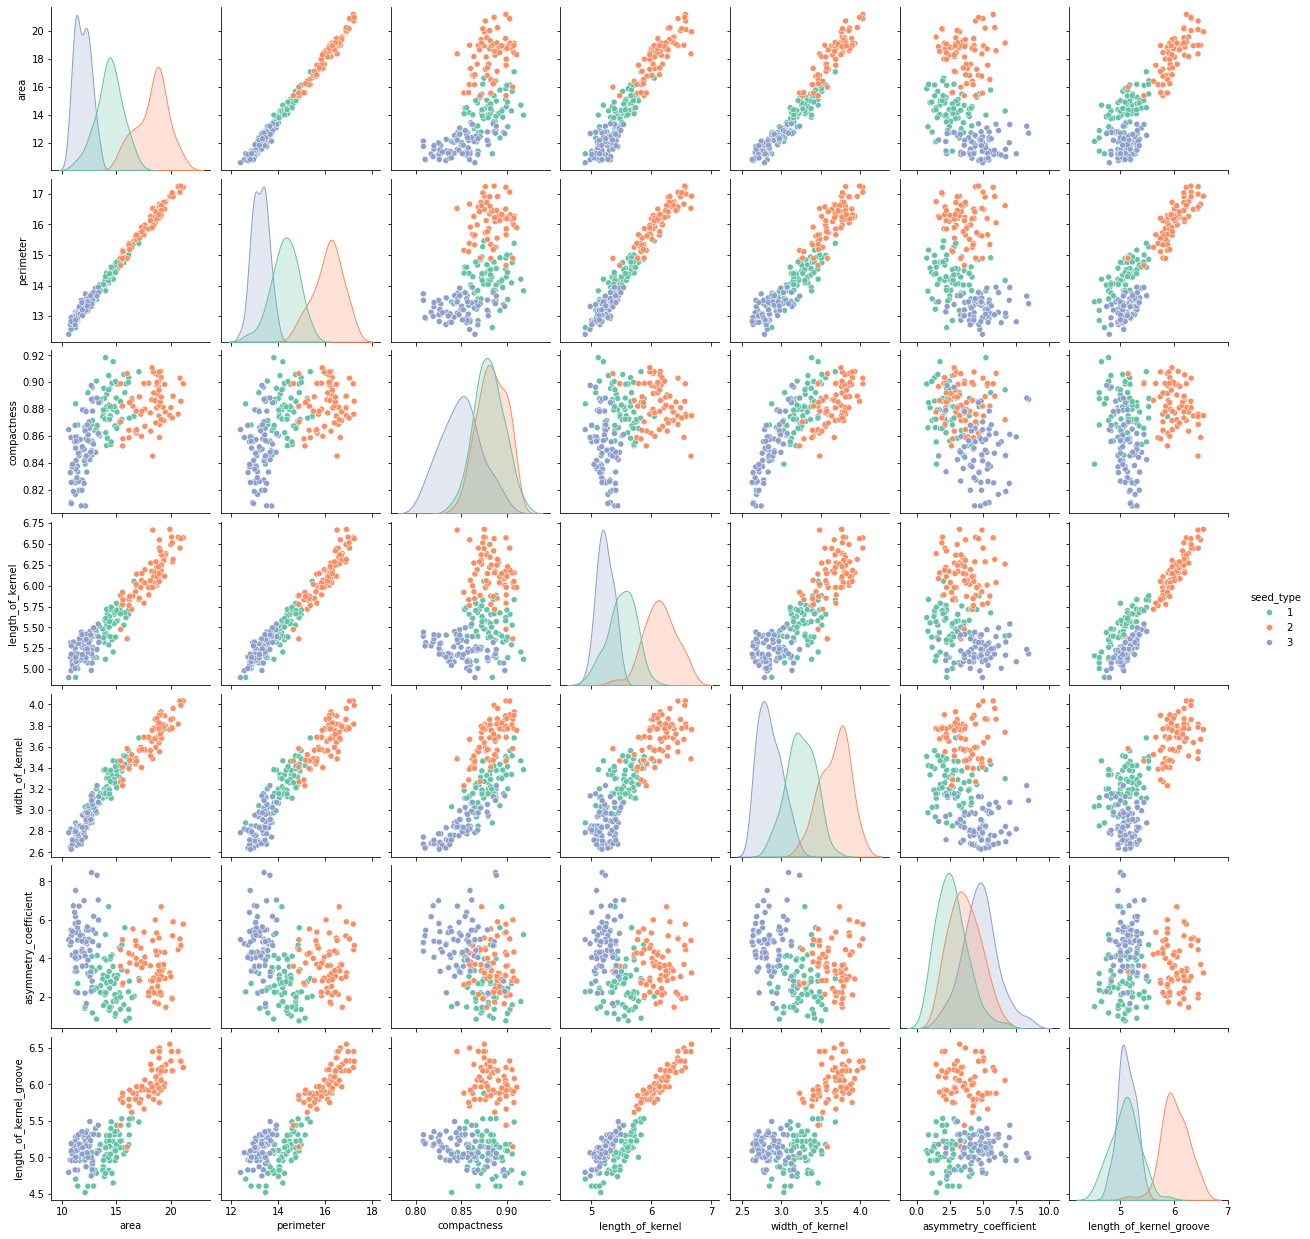

In [91]:
# Plot the pairplot
sns.pairplot(seeds_df, hue='seed_type', palette='Set2')

In [78]:
# Split the data into features and target labels
X = seeds_df.iloc[:, :-1]  # all columns except the last one
y = seeds_df['seed_type']  # the last column

In [79]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

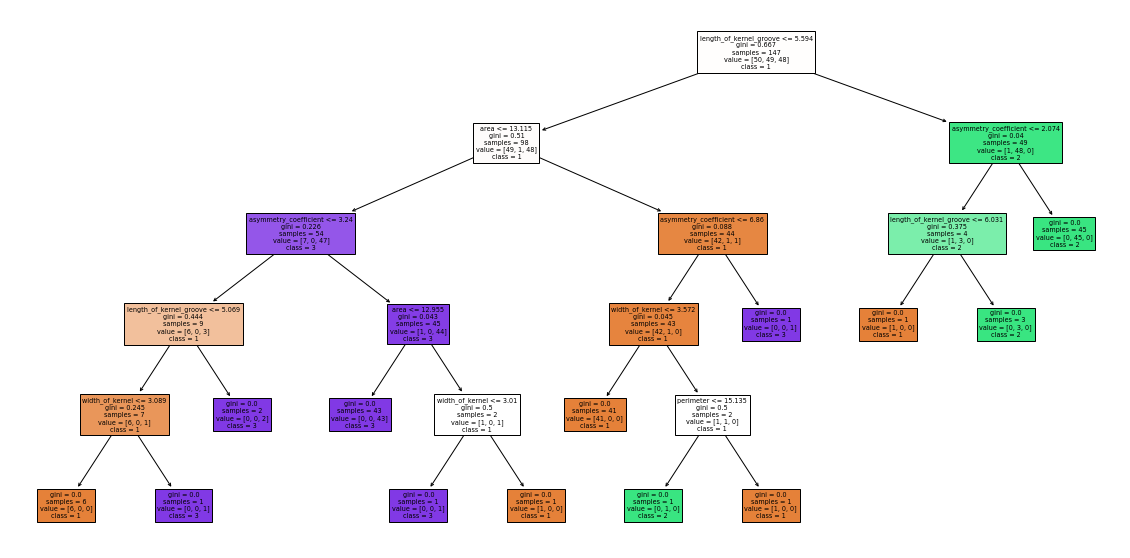

In [81]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=column_names[:-1], class_names=['1', '2', '3']) #Seed types are Kama Rosa Canadian labeled as 1 ,2 3,
plt.show()


In [82]:
# Evaluate the classifier
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


In [84]:
# Predict the labels for test set
y_pred = clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the decision tree
print("Decision Tree:")
print(clf.tree_)

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.85      0.79        20
           2       1.00      0.86      0.92        21
           3       0.86      0.86      0.86        22

    accuracy                           0.86        63
   macro avg       0.87      0.86      0.86        63
weighted avg       0.87      0.86      0.86        63

Decision Tree:


Using a confusuion matrix

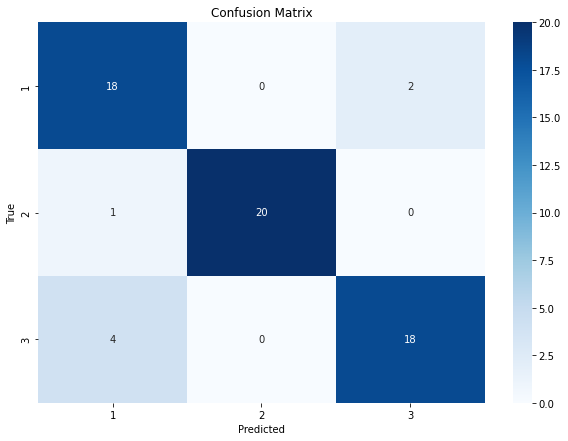

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3'], yticklabels=['1', '2', '3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Using a random forest classifier 

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree # used to visualze a tree from a random forest
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and target labels
X = seeds_df.iloc[:, :-1]  # all columns except the last one
y = seeds_df['seed_type']  # the last column



In [86]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #testing data is 30%

In [87]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=42) #100 is the default number of estimators
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, random_state=42)

In [88]:
# Make predictions and evaluate the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# it appears that 0.89 is the best accurary you cna obtian with the random forest classifier.

Accuracy: 0.89


In [89]:
# Predict the labels for test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8888888888888888
Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       1.00      0.95      0.98        21
           3       0.90      0.82      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63



In [90]:
# Check the number of estimators used in teh random forest
num_estimators = clf.n_estimators
print(f"Number of estimators used in the Random Forest: {num_estimators}")

Number of estimators used in the Random Forest: 10000


Visualziing a tree from the random forest

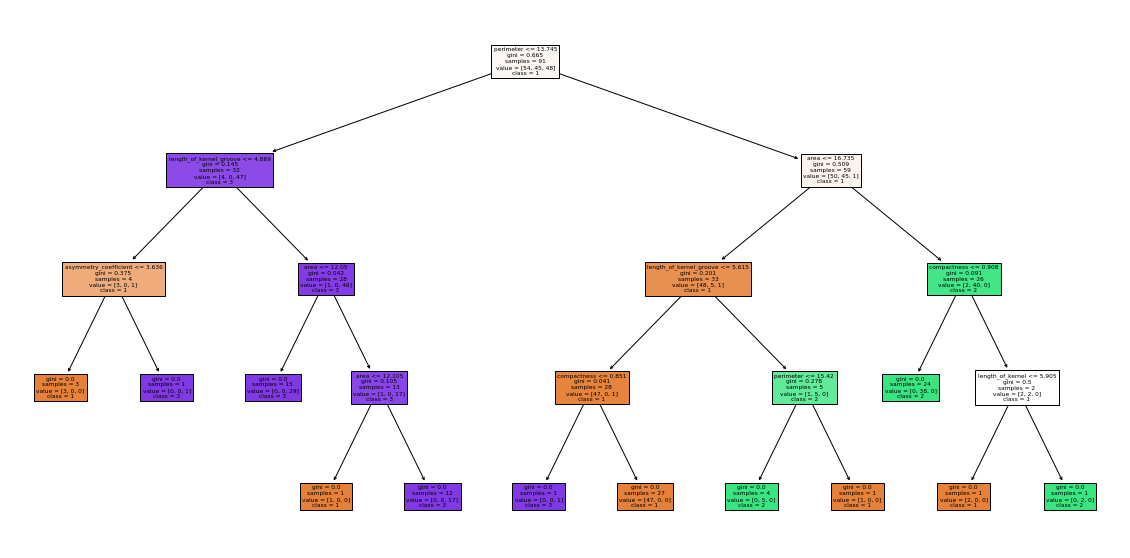

In [49]:
# Select a tree from the forest
#Different estimators from random forest Labled 0 = 7
#['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'seed_type' ]
tree = clf.estimators_[6]

# Visualize the selected tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=column_names[:-1], class_names=['1', '2', '3'])
plt.show()